# Support Vector Machine

![http://docs.opencv.org/_images/optimal-hyperplane.png](http://docs.opencv.org/_images/optimal-hyperplane.png)



They are an evolved form of the Perceptron.

See this link:  http://www.tristanfletcher.co.uk/SVM%20Explained.pdf  for a nice paper (first 10 pages) that goes into the math.  Also here for the scikit-learn page:  http://scikit-learn.org/stable/modules/svm.html#kernel-functions




In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import datasets


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mystery.csv',header=None)
mdata = df[[0,1]].values
cats = df[2].values

Xtrain, Xtest, Ctrain, Ctest = train_test_split(mdata, cats)

In [3]:
classifier = SVC()
classifier.fit(Xtrain,Ctrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [4]:
Cpred = classifier.predict(Xtest)
print(classification_report(Ctest,Cpred))

             precision    recall  f1-score   support

         -1       1.00      0.95      0.98        22
          1       0.97      1.00      0.98        28

avg / total       0.98      0.98      0.98        50



## Compare the performance of the Perceptron and the SVM on the iris and digits data

### Iris Data Set

In [5]:
iris = datasets.load_iris()
x,y = iris.data, iris.target
Xtrain, Xtest, Ctrain, Ctest = train_test_split(x,y)

classifier = SVC()
classifier.fit(Xtrain,Ctrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
Cpred = classifier.predict(Xtest)
print(classification_report(Ctest,Cpred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      1.00      1.00        15
          2       1.00      1.00      1.00        14

avg / total       1.00      1.00      1.00        38



[[ 9  0  0]
 [ 0 15  0]
 [ 0  0 14]]


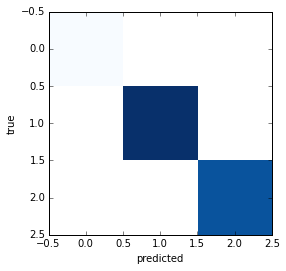

In [7]:
ypred = classifier.predict(Xtest)
print(confusion_matrix(Ctest,Cpred))

plt.imshow(np.log(confusion_matrix(Ctest,Cpred)),
          cmap='Blues',interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||




# Digits Data Set

In [8]:
df = datasets.load_digits(n_class=10)
x,y = df.data, df.target
Xtrain, Xtest, Ctrain, Ctest = train_test_split(x,y)

classifier = SVC(kernel='linear')
classifier.fit(Xtrain,Ctrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
Cpred = classifier.predict(Xtest)
print(classification_report(Ctest,Cpred))

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        44
          1       0.93      1.00      0.96        50
          2       1.00      1.00      1.00        43
          3       1.00      1.00      1.00        46
          4       0.98      1.00      0.99        49
          5       0.98      1.00      0.99        45
          6       1.00      0.98      0.99        53
          7       0.98      0.98      0.98        45
          8       0.97      0.93      0.95        40
          9       0.97      0.91      0.94        35

avg / total       0.98      0.98      0.98       450



[[43  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 49  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  1  0]
 [ 0  0  0  0  0  0  0 44  0  1]
 [ 0  2  0  0  0  1  0  0 37  0]
 [ 0  2  0  0  0  0  0  1  0 32]]
[0 1 2 3 4 5 6 7 8 9]


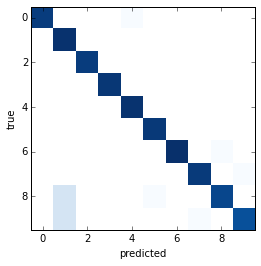

In [10]:
ypred = classifier.predict(Xtest)
print(confusion_matrix(Ctest,Cpred))
print(df.target_names)
plt.imshow(np.log(confusion_matrix(Ctest,Cpred)),
          cmap='Blues',interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

# |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

# Typed Letter Images
        

In [11]:
temp = list(range(400))
df = pd.read_csv('letters.csv',header=None)
mdata = df[temp].values
cats = df[[400]].values

Xtrain, Xtest, Ctrain, Ctest = train_test_split(mdata, cats)

classifier = SVC(kernel='linear')
classifier.fit(Xtrain,Ctrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
Cpred = classifier.predict(Xtest)
print(classification_report(Ctest,Cpred))

             precision    recall  f1-score   support

          A       0.98      1.00      0.99        57
          B       1.00      1.00      1.00        52
          C       0.80      0.78      0.79        51
          D       1.00      0.96      0.98        51
          E       1.00      0.98      0.99        49
          F       0.96      1.00      0.98        43
          G       1.00      1.00      1.00        60
          H       1.00      1.00      1.00        59
          I       0.69      0.63      0.66        43
          J       0.98      0.96      0.97        53
          K       1.00      1.00      1.00        51
          L       1.00      1.00      1.00        42
          M       1.00      0.98      0.99        62
          N       0.98      0.98      0.98        53
          O       0.71      0.64      0.67        53
          P       1.00      0.94      0.97        36
          Q       1.00      1.00      1.00        47
          R       1.00      0.96      0.98   

[[57  0  0 ...,  0  0  0]
 [ 0 52  0 ...,  0  0  0]
 [ 0  0 40 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., 36  0  0]
 [ 0  0  0 ...,  0 45  0]
 [ 0  0  0 ...,  0  0 43]]


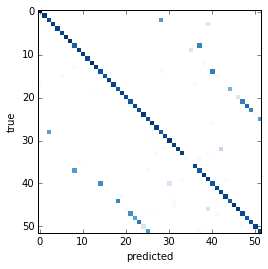

In [13]:
ypred = classifier.predict(Xtest)
print(confusion_matrix(Ctest,Cpred))
plt.imshow(np.log(confusion_matrix(Ctest,Cpred)),
          cmap='Blues',interpolation='nearest')
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');